# <font color=#FF1493>Bio-Inspired Learning</font>

## <font color=#FF69B4>Differential Evolution</font>


---
* #### <font color=#F5F5D6>This Notebooks implements the ideas and code in [Differential Evolution an alternative to Nonlinear Convex Optimization](https://towardsdatascience.com/differential-evolution-an-alternative-to-nonlinear-convex-optimization-690a123f3413)
</font>
---
---
### <font color=#C0C0C0>Master of Science in Signal Theory and Communications (MUTSC)</font>
### *Signal processing and machine learning for big data*
## <font color=orange>ETSIT - UPM</font>
---



### We will use the Differential Evolution implemented in [Scipy: Optimize Differential Evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html)

In [17]:
! pip install pyMetaheuristic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 9.2 MB/s eta 0:00:00


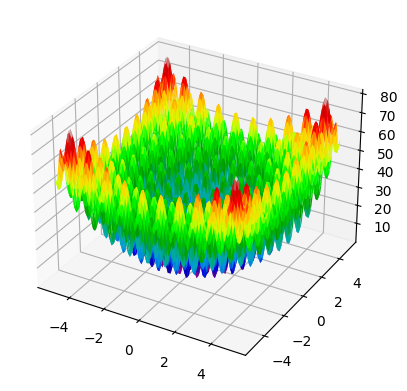

In [9]:
# rastrigin_graph.py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
from mpl_toolkits import mplot3d

 
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
 
fig = plt.figure() 
ax = fig.add_subplot(111,projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    
# plt.savefig('rastrigin_graph.png')
plt.show()


In [12]:
def rastrigin_2d(v):
 X, Y = v
 return (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20

In [19]:
from pyMetaheuristic.utils import graphs

# Target Function - Values
plot_parameters = {
    'min_values': (-5, -5),
    'max_values': (5, 5),
    'step': (0.1, 0.1),
    'solution': [],
    'proj_view': '3D',
    'view': 'notebook'
}
graphs.plot_single_function(target_function = rastrigin_2d, **plot_parameters)

In [15]:
import numpy as np

from scipy.optimize import rosen, differential_evolution

# define range for input
r_min, r_max = -5.0, 5.0
# define the bounds on the search
bounds = [[r_min, r_max], [r_min, r_max]]

result = differential_evolution(rastrigin_2d, bounds)

print('Optimization Result:              ', result.x)
print('Values of the objective function: ', result.fun)

Optimization Result:               [-1.19481203e-09 -3.62321506e-09]
Values of the objective function:  0.0


## Pressure vessel design: Real valued

Engineering pressure vessel design

The next problem was proposed by Sandgren (1990) and it minimizes the cost of a pressure vessel design. The problem has two discrete variables x1 and x2, due to material supply standards, therefore it is, in its original formulation, nondifferentiable. However, in this section, we will at first solve a continuous real-valued variant of the problem and then solve the original.

https://github.com/bruscalia/optimization-demo-files/blob/main/nonconvex/de_scipy.ipynb

**minimize**

$f(\boldsymbol{x}) = 0.6224 x_1 x_3 x_4 + 1.7781 x_2 x_3^2 + 3.1611 x_1^2 x_4 + 19.84 x_1^2 x_3$

**subject to**

$g_1(\boldsymbol{x}) \equiv 0.0193 x_3 - x_1 \leq 0\\$
$g_2(\boldsymbol{x}) \equiv 0.00954 x_3 - x_2 \leq 0\\$
$g_3(\boldsymbol{x}) \equiv 750 \times 1728 - \pi x_3^2 x_4 - \frac{4}{3} \pi x_3^3 \leq 0$

**boundaries**

$1.1 \leq x_1 \leq 12.5\\$
$0.6 \leq x_2 \leq 12.5\\$
$0.0 \leq x_3 \leq 240\\$
$0.0 \leq x_4 \leq 240\\$

In [20]:
def f_vessel(x):
    return 0.6224 * x[0] * x[2] * x[3]\
        + 1.7781 * x[1] * x[2] ** 2\
        + 3.1611 * x[0] ** 2 * x[3]\
        + 19.84 * x[0] ** 2 * x[2]

def c1_vessel(x):
    return - (0.0193 * x[2] - x[0])

def c2_vessel(x):
    return - (0.00954 * x[2] - x[1])

def c3_vessel(x):
    return - (750 * 1728 - \
        np.pi * x[2] ** 2 * x[3]\
        - 4/3 * np.pi * x[2] ** 3)

**gradient information**

\begin{align*}
&\nabla f(\boldsymbol{x}) =
\begin{bmatrix}
    0.6224 x_3 x_4 + 6.3222 x_1 x_4 + 39.68 x_1 x_3\\
    1.7781 x_3^2 \\
    0.6224 x_1 x_4 + 3.5562 x_2 x_3 + 19.84 x_1^2\\
    0.6224 x_1 x_3 + 3.1611 x_1^2
\end{bmatrix} \\
&\nabla g_1(\boldsymbol{x}) =
\begin{bmatrix}
    -1 \leq 0\\
    0 \\
    0.0193\\
    0
\end{bmatrix} \\
&\nabla g_2(\boldsymbol{x}) =
\begin{bmatrix}
    0 \leq 0\\
    -1 \\
    0.00954\\
    0
\end{bmatrix} \\
&\nabla g_3(\boldsymbol{x}) =
\begin{bmatrix}
    0\\
    0\\
    -2 \pi x_3 x_4 - 4 \pi x_3^2\\
    -\pi x_3^2
\end{bmatrix} \\
\end{align*}

In [25]:
def f_vessel(x):
    
    return 0.6224 * x[0] * x[2] * x[3] + 1.7781 * x[1] * x[2] ** 2 + 3.1611 * x[0] ** 2 * x[3] + 19.84 * x[0] ** 2 * x[2]

def grad_vessel(x):
    
    return np.array([0.6224 * x[2] * x[3] + 6.3222 * x[0] * x[3] + 39.68 * x[0] * x[2],
                     1.7781 * x[2] ** 2,
                     0.6224 * x[0] * x[3] + 3.5562 * x[1] * x[2] + 19.84 * x[0] ** 2,
                     0.6224 * x[0] * x[2] + 3.1611 * x[0] ** 2])
    
def c1_vessel(x):
    return - (0.0193 * x[2] - x[0])

def c2_vessel(x):
    return - (0.00954 * x[2] - x[1])

def c3_vessel(x):
    return - (750 * 1728 - np.pi * x[2] ** 2 * x[3] - 4/3 * np.pi * x[2] ** 3)

def c1_grad(x):
    
    return np.array([1,
                     0,
                     -0.0193,
                     0])

def c2_grad(x):
    
    return np.array([0,
                     1,
                     -0.00954,
                     0])

def c3_grad(x):
    
    return np.array([0,
                     0,
                     (2 * np.pi * x[2] * x[3] + 4 * np.pi * x[2] ** 2),
                     np.pi * x[2] ** 2])

In [26]:
from scipy.optimize import minimize, differential_evolution, NonlinearConstraint

c1 = NonlinearConstraint(c1_vessel, 0.0, np.inf, jac=c1_grad)
c2 = NonlinearConstraint(c2_vessel, 0.0, np.inf, jac=c2_grad)
c3 = NonlinearConstraint(c3_vessel, 0.0, np.inf, jac=c3_grad)

cons_vessel = [c1, c2, c3]

In [27]:
bounds_vessel = [(1.1, 12.5), (0.6, 12.5), (0.0, 240.0), (0.0, 240.0)]

In [28]:
sol_de_vessel = differential_evolution(
    f_vessel, bounds=bounds_vessel,
    constraints=cons_vessel,
    popsize=50, strategy="rand1bin",
    recombination=0.7, mutation=(0.3, 1.0),
    maxiter=300, seed=12,
    init='latinhypercube', polish=False
)

In [29]:
print(sol_de_vessel)

          message: Optimization terminated successfully.
          success: True
              fun: 7083.250469573429
                x: [ 1.110e+00  6.055e-01  5.739e+01  4.909e+01]
              nit: 96
             nfev: 12492
           constr: [array([ 0.000e+00]), array([ 0.000e+00]), array([ 0.000e+00])]
 constr_violation: 0.0
            maxcv: 0.0


## Plot this simple function

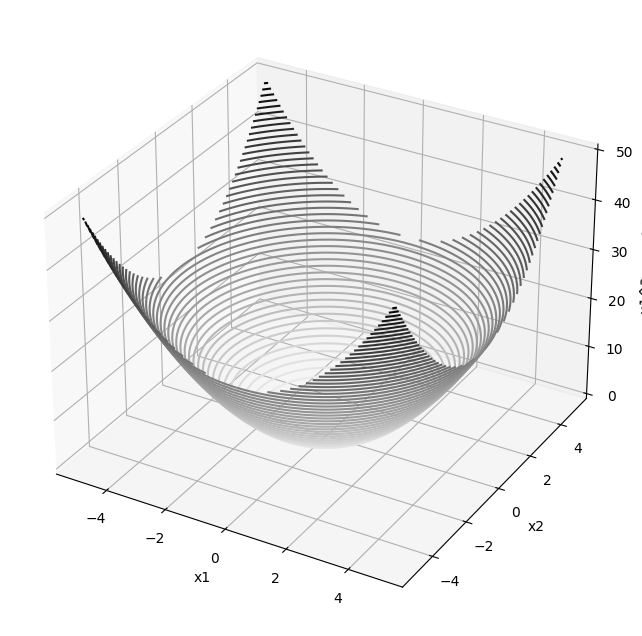

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

fitness = [[x1*x1 + x2*x2  for x1 in np.arange(-5, 5, 0.01)] for x2 in np.arange(-5, 5, 0.01)]

x1 = np.arange(-5, 5, 0.01)
x2 = np.arange(-5, 5, 0.01)

X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, fitness, 50, cmap='binary')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x1^2 + x2^2')

In [ ]:
! pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pygad

print(pygad.__version__)

3.0.0


### The first thing to do is to prepare the <font color=orange>fitness function</font> as given below.

*   It calculates the sum of x1^2 + x2^2
*   The solutions with the highest fitness values are selected as parent

In [ ]:
import numpy as np

def fitness_function(ga_instance,solution, solution_idx):
    return np.sum(np.array(solution)*np.array(solution))

In [ ]:
solution =[[-4,3]]

print('fitness function for solution: ', solution, 'value= ', fitness_function(_,solution,_))

fitness function for solution:  [[-4, 3]] value=  25


## Now we prepare the list of important parameters for GA

* You can check the list of paramneters in [PyGAD parameters](https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html?ref=blog.paperspace.com#init)


In [ ]:
sol_per_pop = 10
num_genes = 2

init_range_low = -5
init_range_high = 5
gen_space = {'low': -5, 'high': 5}


crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 50

num_generations = 5
num_parents_mating = 6



## After the parameters are prepared, an instance of the pygad.GA class is created.

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_space = gen_space )

# After creating the instance, the run() method is called to start the optimization.

In [ ]:
ga_instance.run()

## After the run() method completes, information about the best solution found by PyGAD can be accessed.

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [4.9134183  4.90198197]
Fitness value of the best solution = 48.171106558684244


### The plot_fitness() method can be used to show the fitness values over the generations.

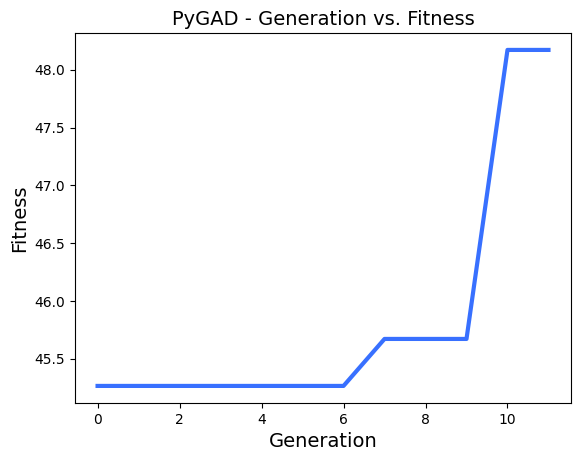

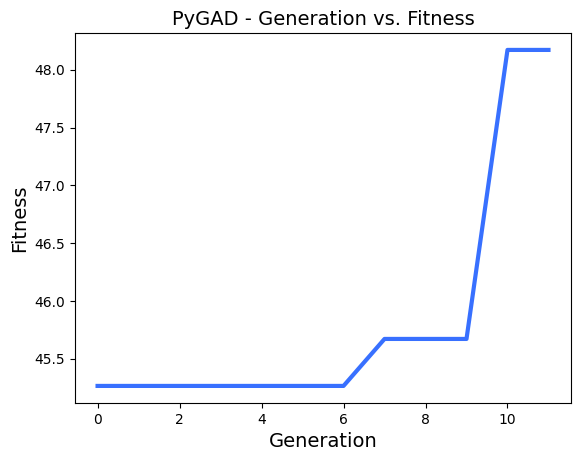

In [ ]:
ga_instance.plot_fitness()

---
---

## In this PyGAD simple example can try making some changes:

* changing the fuction
* crossover
* mutation
* ...



